# Cena com Robô Pioneer 3DX, Móveis e Pessoas: Sistemas de Coordenadas

### Alunos: Alexis Duarte Guimarães Mariz e Davi Fraga Marques Neves

### Questão 1. Criação da cena via script(é necessário ajustar a variável coppelia_base_dir).

In [1]:
# Caminhos dos modelos
#coppelia_base_dir = r'/Users/davifragamarques/Downloads/coppeliaSim 2.app/Contents/Resources'
coppelia_base_dir = r'/home/alexis/apps/CoppeliaSim_Edu_V4_10_0_rev0_Ubuntu22_04'

from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import os, math
import numpy as np
import matplotlib.pyplot as plt

client = RemoteAPIClient()
sim = client.require('sim')

# Garante que a simulação esteja parada
sim.stopSimulation()

# Limpa a cena atual
sim.closeScene()
sim.loadScene('')  # cena vazia

p3dx_path     = os.path.join(coppelia_base_dir, "models/robots/mobile/pioneer p3dx.ttm")
sitting_path  = os.path.join(coppelia_base_dir, "models/people/Sitting Bill.ttm")
standing_path = os.path.join(coppelia_base_dir, "models/people/Standing Bill.ttm")
table_path    = os.path.join(coppelia_base_dir, "models/furniture/tables/diningTable.ttm")
chair_path    = os.path.join(coppelia_base_dir, "models/furniture/chairs/dining chair.ttm")
laptop_path   = os.path.join(coppelia_base_dir, "models/office items/laptop.ttm")
cupboard_path = os.path.join(coppelia_base_dir, "models/furniture/shelves-cupboards-racks/deep cupboard.ttm")
rack_path     = os.path.join(coppelia_base_dir, "models/furniture/shelves-cupboards-racks/rack.ttm")
plant_path    = os.path.join(coppelia_base_dir, "models/furniture/plants/indoorPlant.ttm")
asti_path     = os.path.join(coppelia_base_dir, "models/robots/mobile/Asti.ttm")

# carregar modelos
p3dx_h     = sim.loadModel(p3dx_path)
table_h    = sim.loadModel(table_path)
chair1_h   = sim.loadModel(chair_path)
chair2_h   = sim.loadModel(chair_path)
sitting_h  = sim.loadModel(sitting_path)
standing_h = sim.loadModel(standing_path)
laptop_h   = sim.loadModel(laptop_path)
cupboard_h = sim.loadModel(cupboard_path)
rack_h     = sim.loadModel(rack_path)
plant_h    = sim.loadModel(plant_path)
asti_h     = sim.loadModel(asti_path)

#posições dos objetos
chair1_xy = (2.25, 1.9, 0.45)
chair1_abg = (0.0, 0.0, -90.0)

table_xy = (1.30, 2, 0.375)
table_abg = (0.0, -90.0, 0.0)

char2_xy = (0.275, 1.9,0.45) #Cadeira do Bill sentado
char2_abg = (0.0, 0.0, 90.0)

sitting_bill_xy = (0.675, 1.9, 0.0)
sitting_bill_abg = (0.0, 0.0, 0.0)

standing_bill_xy = (1.45, 1.125, 0.0)
standing_bill_abg = (0.0, 0.0, 130.0)

laptop_xy = (0.75, 1.95, 0.82739)
laptop_abg = (0.0, 50.0, -180.0)

p3dx_xy = (-2.0, -2.0, 0.13879)
p3dx_abg = (0.0, 0.0, 0.0)

cupboard_xy = (-2.0, 1.8, 1.0)
cupboard_abg = (0.0, 0.0, -180.0)

rack_xy = (-2.0, 0.4, 0.85)
rack_abg = (0.0, 0.0, 0.0)

plant_xy = (2.25, -2.25, 0.165)
plant_abg = (0.0, 0.0, 0.0)

asti_xy = (0.1, -1.7, 0.80597)
asti_abg = (180.0, 0.0, -130.0)

# Mesa
sim.setObjectPosition(table_h, -1, [table_xy[0], table_xy[1], table_xy[2]])
sim.setObjectOrientation(table_h, -1, [math.radians(table_abg[0]),math.radians(table_abg[1]),math.radians(table_abg[2])])

# Cadeira 1
sim.setObjectPosition(chair1_h, -1, [chair1_xy[0], chair1_xy[1], chair1_xy[2]])
sim.setObjectOrientation(chair1_h, -1, [math.radians(chair1_abg[0]),math.radians(chair1_abg[1]),math.radians(chair1_abg[2])])

# Cadeira 2 (Bill sentado)
sim.setObjectPosition(chair2_h, -1, [char2_xy[0], char2_xy[1], char2_xy[2]])
sim.setObjectOrientation(chair2_h, -1, [math.radians(char2_abg[0]),math.radians(char2_abg[1]),math.radians(char2_abg[2])])

# Bill sentado
sim.setObjectPosition(sitting_h, -1, [sitting_bill_xy[0], sitting_bill_xy[1], sitting_bill_xy[2]])
sim.setObjectOrientation(sitting_h, -1, [math.radians(sitting_bill_abg[0]),math.radians(sitting_bill_abg[1]),math.radians(sitting_bill_abg[2])])

# Bill de pé
sim.setObjectPosition(standing_h, -1, [standing_bill_xy[0], standing_bill_xy[1], standing_bill_xy[2]])
sim.setObjectOrientation(standing_h, -1, [math.radians(standing_bill_abg[0]),math.radians(standing_bill_abg[1]),math.radians(standing_bill_abg[2])])

# Robô Pioneer 3DX
sim.setObjectPosition(p3dx_h, -1, [p3dx_xy[0], p3dx_xy[1], p3dx_xy[2]])
sim.setObjectOrientation(p3dx_h, -1, [math.radians(p3dx_abg[0]),math.radians(p3dx_abg[1]),math.radians(p3dx_abg[2])])

# Laptop
sim.setObjectPosition(laptop_h, -1, [laptop_xy[0], laptop_xy[1], laptop_xy[2]])
sim.setObjectOrientation(laptop_h, -1, [math.radians(laptop_abg[0]),math.radians(laptop_abg[1]),math.radians(laptop_abg[2])])

# Cupboard
sim.setObjectPosition(cupboard_h, -1, [cupboard_xy[0], cupboard_xy[1], cupboard_xy[2]])
sim.setObjectOrientation(cupboard_h, -1, [math.radians(cupboard_abg[0]),math.radians(cupboard_abg[1]),math.radians(cupboard_abg[2])])

# Rack
sim.setObjectPosition(rack_h, -1, [rack_xy[0], rack_xy[1], rack_xy[2]])
sim.setObjectOrientation(rack_h, -1, [math.radians(rack_abg[0]),math.radians(rack_abg[1]),math.radians(rack_abg[2])])

# Plant
sim.setObjectPosition(plant_h, -1, [plant_xy[0], plant_xy[1], plant_xy[2]])
sim.setObjectOrientation(plant_h, -1, [math.radians(plant_abg[0]),math.radians(plant_abg[1]),math.radians(plant_abg[2])])

# Robô Asti
sim.setObjectPosition(asti_h, -1, [asti_xy[0], asti_xy[1], asti_xy[2]])
sim.setObjectOrientation(asti_h, -1, [math.radians(asti_abg[0]),math.radians(asti_abg[1]),math.radians(asti_abg[2])])


### Questão 2. Adiciona os sistemas de coordenadas em todos os objetos e faz plots com os sistemas de coordenadas e a representação de algumas transformações entre os objetos.

In [2]:
from collections import OrderedDict

# Caminho do modelo de referencial
ref_frame_path = os.path.join(coppelia_base_dir, "models/other/reference frame.ttm")

def add_frame_for(obj_h, name, size=0.2, local_offset=(0,0,0), local_euler_deg=(0,0,0)):
    """
    Carrega um 'reference frame', coloca como filho do objeto e o alinha no frame local do objeto.
    Retorna o handle do frame.
    """
    if obj_h is None or obj_h == -1:
        raise RuntimeError(f"Objeto para frame '{name}' inválido")

    fh = sim.loadModel(ref_frame_path)

    # torna o frame filho do objeto para grudar
    sim.setObjectParent(fh, obj_h, True)
    
    # zera pose local e aplica offset/orientação local desejados
    sim.setObjectPosition(fh, obj_h, list(local_offset))
    rx, ry, rz = [math.radians(x) for x in local_euler_deg]
    sim.setObjectOrientation(fh, obj_h, [rx, ry, rz])

    # nome e tamanho (o reference frame respeita objfloatparam_size)
    sim.setObjectAlias(fh, f"frame_{name}")
    try:
        sim.setObjectFloatParam(fh, sim.objfloatparam_size, float(size))
    except Exception:
        pass  # caso a versão não tenha esse param, o tamanho padrão fica

    return fh

# Cria um frame "mundo" apenas como referência (não é necessário carregar modelo):
world_h = -1  # handle do mundo no CoppeliaSim

# Adiciona frames para cada item da sua cena
frames = OrderedDict()
frames['world']        = world_h
frames['p3dx']         = add_frame_for(p3dx_h, 'p3dx', size=0.25)
frames['table']        = add_frame_for(table_h, 'table', size=0.2)
frames['chair1']       = add_frame_for(chair1_h, 'chair1', size=0.18)
frames['chair2']       = add_frame_for(chair2_h, 'chair2', size=0.18)
frames['sittingBill']  = add_frame_for(sitting_h, 'sittingBill', size=0.15, local_offset=(0,0,0.9))
frames['standingBill'] = add_frame_for(standing_h, 'standingBill', size=0.18, local_offset=(0,0,1.0))
frames['laptop']       = add_frame_for(laptop_h, 'laptop', size=0.12)
frames['cupboard']     = add_frame_for(cupboard_h, 'cupboard', size=0.18)
frames['rack']         = add_frame_for(rack_h, 'rack', size=0.18)
frames['plant']        = add_frame_for(plant_h, 'plant', size=0.15)
frames['asti']         = add_frame_for(asti_h, 'asti', size=0.22)

In [3]:
def mat4_from_sim(obj, rel):
    """
    Retorna matriz 4x4 homogênea de 'obj' em relação a 'rel' (ambos handles).
    """
    M = sim.getObjectMatrix(obj, rel)  # retorna 12 valores (3x4) em ordem linha
    # Converte 3x4 para 4x4 homogênea
    H = [[M[0], M[1], M[2],  M[3]],
         [M[4], M[5], M[6],  M[7]],
         [M[8], M[9], M[10], M[11]],
         [0.0,  0.0,  0.0,   1.0]]
    return H

def euler_deg_from_mat(H):
    """
    Converte rot (3x3) da matriz 4x4 para ângulos de Euler (alpha,beta,gamma) em graus no padrão do CoppeliaSim.
    """
    M = [H[0][0], H[0][1], H[0][2], 0.0,
         H[1][0], H[1][1], H[1][2], 0.0,
         H[2][0], H[2][1], H[2][2], 0.0]
    e = sim.getEulerAnglesFromMatrix(M)  # rad
    return [math.degrees(e[0]), math.degrees(e[1]), math.degrees(e[2])]

def pose_from_H(H):
    tx, ty, tz = H[0][3], H[1][3], H[2][3]
    rdeg = euler_deg_from_mat(H)
    return (tx, ty, tz, rdeg[0], rdeg[1], rdeg[2])

# arestas (origem -> destino) para registrar transformações T_dest^origem
edges = [
    ('world','p3dx'),
    ('world','table'),
    ('world','chair1'),
    ('world','chair2'),
    ('world','standingBill'),
    ('world','sittingBill'),
    ('world','laptop'),
    ('world','asti'),
    ('world','rack'),
    ('world','plant'),
    ('world','cupboard'),
    ('table','laptop'),
    ('chair2','sittingBill'),
    ('p3dx','asti'),
]

tf_graph = []
for a,b in edges:
    A = frames[a]
    B = frames[b]
    H = mat4_from_sim(B, A)  # T_B^A
    tx,ty,tz, rx,ry,rz = pose_from_H(H)
    tf_graph.append({
        'from': a,
        'to': b,
        'T': H,
        't': [tx,ty,tz],
        'euler_deg': [rx,ry,rz],
    })

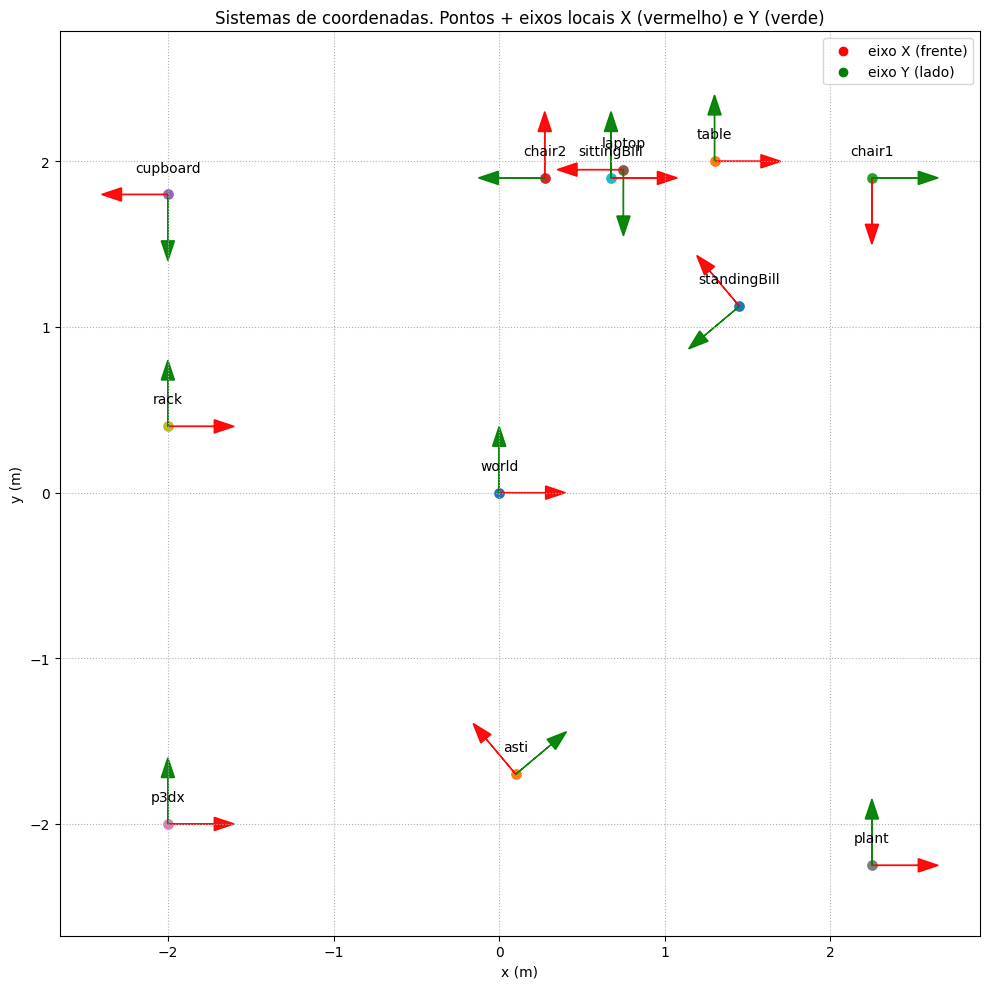

In [4]:
# 1) Posições reais x–y (todos os nós) em relação ao 'world'
pos = {'world': (0.0, 0.0)}
all_nodes = set()
for e in tf_graph:
    all_nodes.add(e['from'])
    all_nodes.add(e['to'])

# função util para extrair rotação 3x3 e eixos
def rot_from_H(H):
    return [[H[0][0], H[0][1], H[0][2]],
            [H[1][0], H[1][1], H[1][2]],
            [H[2][0], H[2][1], H[2][2]]]

for name in sorted(all_nodes):
    if name == 'world':
        continue
    if name not in frames or frames[name] in (None, -1):
        continue
    H = mat4_from_sim(frames[name], frames['world'])  # ^world T_name
    tx, ty, tz, *_ = pose_from_H(H)
    pos[name] = (tx, ty)


# 2) Desenhar pontos e eixos
plt.figure(figsize=(10,10))

# parâmetros visuais
AX_LEN = 0.40  # comprimento das setas dos eixos (em metros na cena)
HEAD_W = 0.08
HEAD_L = 0.12

# desenha cada nó e seus eixos
for name, (x, y) in pos.items():
    # marca o ponto e o rótulo
    plt.scatter([x], [y], s=45)
    plt.text(x, y+0.12, name, ha='center', va='bottom')

    # pular o 'world' se não quiser eixos nele
    if name == 'world':
         # eixo do world: identidade (X: +x, Y: +y)
        dx_x, dy_x = AX_LEN, 0.0
        dx_y, dy_y = 0.0, AX_LEN

    else:
        # pega eixos locais X e Y (em coordenadas do mundo)
        H = mat4_from_sim(frames[name], frames['world'])
        R = rot_from_H(H)
        # coluna 0 = eixo X_local no mundo; coluna 1 = eixo Y_local no mundo
        x_axis_world = (R[0][0], R[1][0], R[2][0])
        y_axis_world = (R[0][1], R[1][1], R[2][1])

        # projetar para 2D (x,y) e normalizar para comprimento AX_LEN
        def vec2_scaled(v3):
            vx, vy = v3[0], v3[1]
            L = math.hypot(vx, vy) or 1.0
            return (AX_LEN * vx / L, AX_LEN * vy / L)

        dx_x, dy_x = vec2_scaled(x_axis_world)  # seta do eixo X
        dx_y, dy_y = vec2_scaled(y_axis_world)  # seta do eixo Y

    # desenhar setas: X em vermelho, Y em verde (convenção comum)
    plt.arrow(x, y, dx_x, dy_x, length_includes_head=True,
              head_width=HEAD_W, head_length=HEAD_L, alpha=0.95, color='r')
    plt.arrow(x, y, dx_y, dy_y, length_includes_head=True,
              head_width=HEAD_W, head_length=HEAD_L, alpha=0.95, color='g')

# ajustes visuais
plt.axis('equal')
plt.grid(True, linestyle=':')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Sistemas de coordenadas. Pontos + eixos locais X (vermelho) e Y (verde)')
# legenda simples (sem handles duplicados)
plt.scatter([], [], color='r', label='eixo X (frente)')
plt.scatter([], [], color='g', label='eixo Y (lado)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

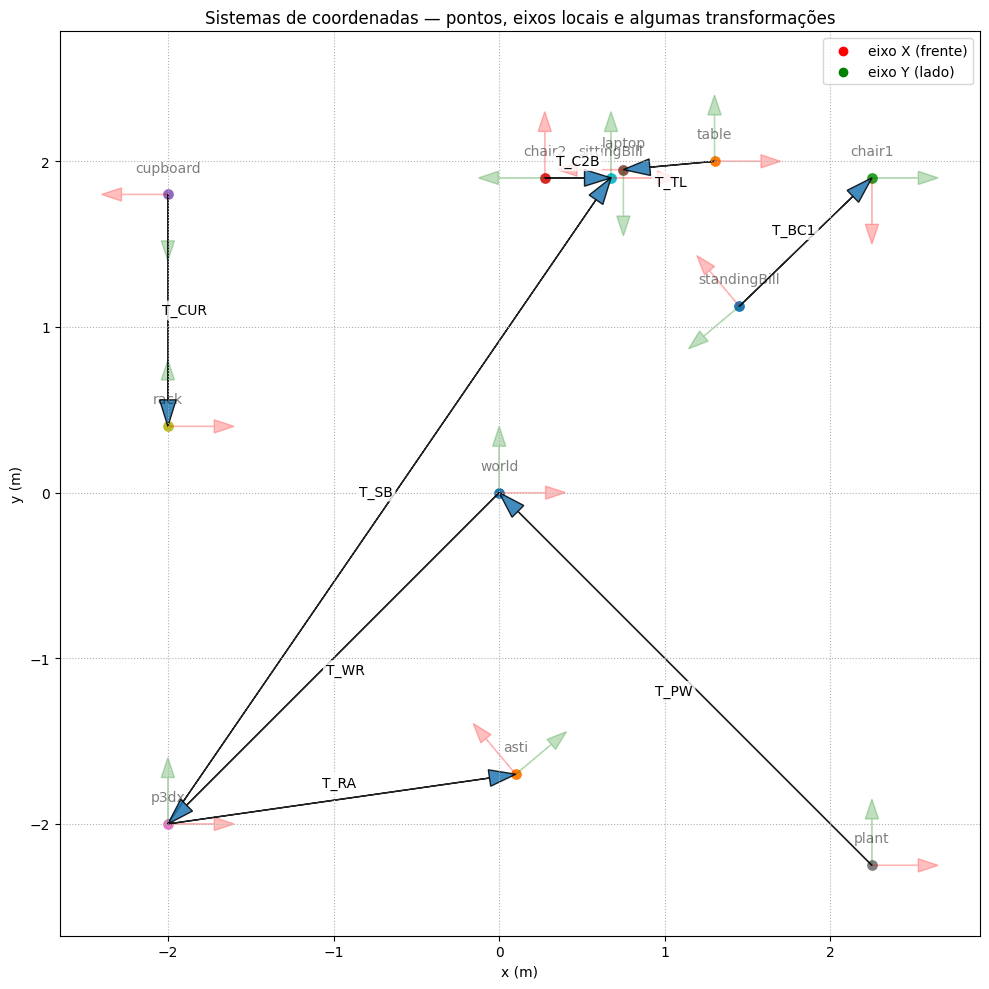

In [5]:
# 1) Posições reais x–y (todos os nós) em relação ao 'world'
pos = {'world': (0.0, 0.0)}
all_nodes = set()
for e in tf_graph:
    all_nodes.add(e['from'])
    all_nodes.add(e['to'])

# função util para extrair rotação 3x3 e eixos
def rot_from_H(H):
    return [[H[0][0], H[0][1], H[0][2]],
            [H[1][0], H[1][1], H[1][2]],
            [H[2][0], H[2][1], H[2][2]]]

for name in sorted(all_nodes):
    if name == 'world':
        continue
    if name not in frames or frames[name] in (None, -1):
        continue
    H = mat4_from_sim(frames[name], frames['world'])  # world T_name
    tx, ty, tz, *_ = pose_from_H(H)
    pos[name] = (tx, ty)


# 2) Desenhar pontos e eixos
import math
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

# parâmetros visuais
AX_LEN  = 0.40  # comprimento das setas dos eixos (m)
HEAD_W  = 0.08
HEAD_L  = 0.12
AX_ALPHA = 0.25
LABEL_ALPHA = 0.50

def vec2_scaled(v3):
    """Projeta (x,y) e normaliza para comprimento AX_LEN."""
    vx, vy = v3[0], v3[1]
    L = math.hypot(vx, vy) or 1.0
    return (AX_LEN * vx / L, AX_LEN * vy / L)

# desenha cada nó e seus eixos (inclui o 'world')
for name, (x, y) in pos.items():
    plt.scatter([x], [y], s=45)
    plt.text(x, y+0.12, name, ha='center', va='bottom',alpha=LABEL_ALPHA)

    if name == 'world':
        dx_x, dy_x = AX_LEN, 0.0
        dx_y, dy_y = 0.0, AX_LEN
    else:
        H = mat4_from_sim(frames[name], frames['world'])
        R = rot_from_H(H)
        x_axis_world = (R[0][0], R[1][0], R[2][0])
        y_axis_world = (R[0][1], R[1][1], R[2][1])
        dx_x, dy_x = vec2_scaled(x_axis_world)  # eixo X (frente)
        dx_y, dy_y = vec2_scaled(y_axis_world)  # eixo Y (lado)

    plt.arrow(x, y, dx_x, dy_x, length_includes_head=True,
              head_width=HEAD_W, head_length=HEAD_L, alpha=AX_ALPHA, color='r')
    plt.arrow(x, y, dx_y, dy_y, length_includes_head=True,
              head_width=HEAD_W, head_length=HEAD_L, alpha=AX_ALPHA, color='g')


# 3) Desenhar TRANSFORMAÇÕES selecionadas como setas rotuladas
pairs_to_plot = [
    ('p3dx', 'sittingBill', 'T_SB'),    # robô (R) para Sitting Bill (SB)
    ('table', 'laptop', 'T_TL'),        # mesa (T) -> laptop (L)
    ('p3dx', 'asti', 'T_RA'),           # robô (R) -> Asti (A)
    ('cupboard', 'rack', 'T_CUR'),      # Cupboard (CU) -> Rack (R)
    ('chair2', 'sittingBill', 'T_C2B'),  # Cadeira 2 (C2) -> Sitting Bill (B)
    ('standingBill', 'chair1', 'T_BC1'), # Standing Bill (SB) -> Cadeira 2 (C)
    ('world', 'p3dx', 'T_WR'),           # World (W) -> Robô (R)
    ('plant', 'world', 'T_PW'),          # Plant (P) -> World (W)
]

HEAD_W_TF = 0.10
HEAD_L_TF = 0.16
LABEL_OFFSET = 0.10  # deslocamento do rótulo na normal da seta (m)

for a, b, lbl in pairs_to_plot:
    if a not in pos or b not in pos:
        # pula pares que não existem no mapa
        continue
    x1, y1 = pos[a]
    x2, y2 = pos[b]
    dx, dy = x2 - x1, y2 - y1
    L = math.hypot(dx, dy) or 1.0

    # seta (a -> b)
    plt.arrow(x1, y1, dx, dy, length_includes_head=True,
              head_width=HEAD_W_TF, head_length=HEAD_L_TF, alpha=0.85)

    # posição do rótulo no meio da seta, levemente deslocado para fora
    mx, my = (x1 + x2) / 2.0, (y1 + y2) / 2.0
    nx, ny = -dy / L, dx / L  # normal unitária
    lx, ly = mx + LABEL_OFFSET * nx, my + LABEL_OFFSET * ny
    plt.text(lx, ly, lbl, ha='center', va='center', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.8))

# 4) ajustes visuais finais
plt.axis('equal')
plt.grid(True, linestyle=':')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Sistemas de coordenadas — pontos, eixos locais e algumas transformações')
plt.scatter([], [], color='r', label='eixo X (frente)')
plt.scatter([], [], color='g', label='eixo Y (lado)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Questão 3. Definição das matrizes de transformação homogêneas que representam as posições de todos os outros elementos da cena no referencial local do robô.

Transformação robô-table:
  [  0.0000   0.0000  -1.0000 |  3.3000 ]
  [  0.0000   1.0000   0.0000 |  4.0000 ]
  [  1.0000   0.0000   0.0000 |  0.2362 ]
  [  0.0000   0.0000   0.0000 |  1.0000 ]

Transformação robô-chair1:
  [  0.0000   1.0000   0.0000 |  4.2500 ]
  [ -1.0000   0.0000   0.0000 |  3.9000 ]
  [  0.0000   0.0000   1.0000 |  0.3112 ]
  [  0.0000   0.0000   0.0000 |  1.0000 ]

Transformação robô-chair2:
  [  0.0000  -1.0000   0.0000 |  2.2750 ]
  [  1.0000   0.0000   0.0000 |  3.9000 ]
  [  0.0000   0.0000   1.0000 |  0.3112 ]
  [  0.0000   0.0000   0.0000 |  1.0000 ]

Transformação robô-sittingBill:
  [  1.0000   0.0000   0.0000 |  2.6750 ]
  [  0.0000   1.0000   0.0000 |  3.9000 ]
  [  0.0000   0.0000   1.0000 |  0.7612 ]
  [  0.0000   0.0000   0.0000 |  1.0000 ]

Transformação robô-standingBill:
  [ -0.6428  -0.7660   0.0000 |  3.4500 ]
  [  0.7660  -0.6428   0.0000 |  3.1250 ]
  [  0.0000   0.0000   1.0000 |  0.8612 ]
  [  0.0000   0.0000   0.0000 |  1.0000 ]

Transforma

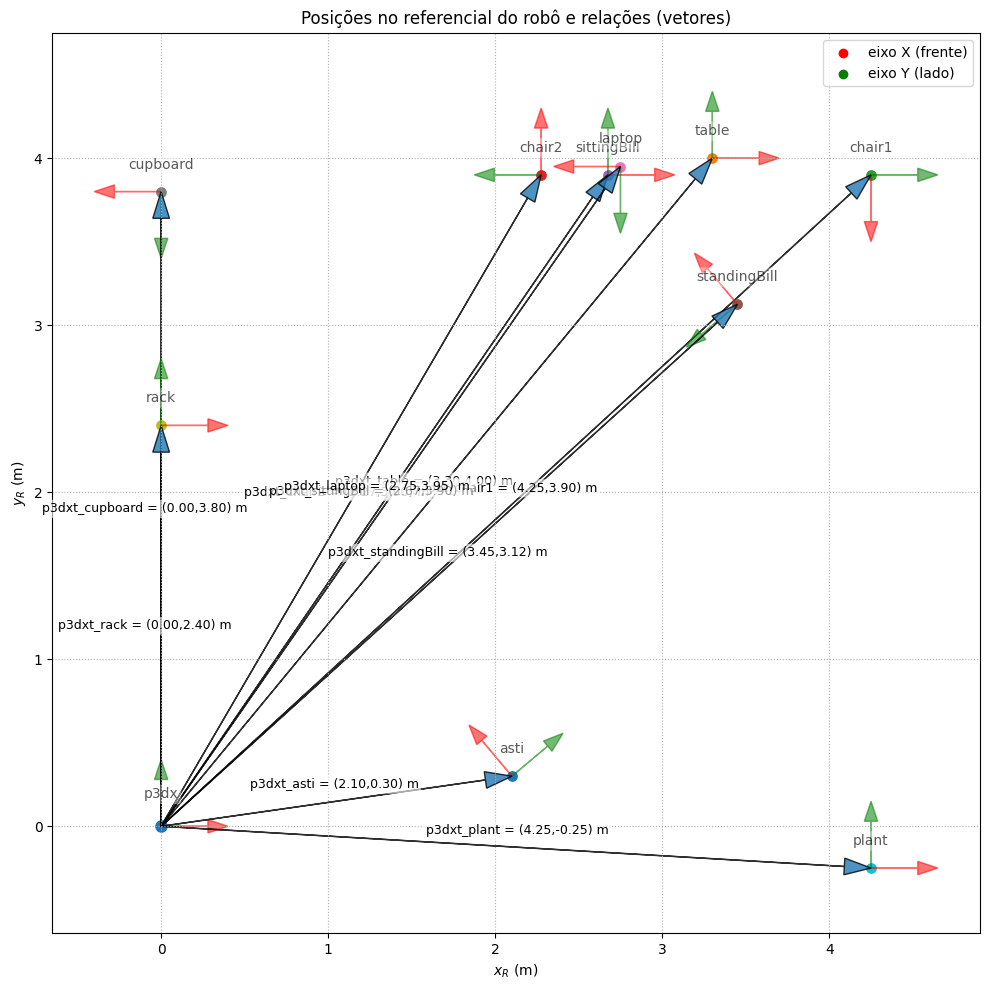

In [6]:
robot_name = 'p3dx'
robot_h = frames[robot_name]
world_h = frames['world']

# utils para álgebra homogênea
def H_from_q(x, y, theta, z=0.0):
    c, s = math.cos(theta), math.sin(theta)
    return [[c, -s, 0, x],
            [s,  c, 0, y],
            [0,  0, 1, z],
            [0,  0, 0, 1]]

def H_mul(A, B):
    C = [[0]*4 for _ in range(4)]
    for i in range(4):
        for j in range(4):
            C[i][j] = sum(A[i][k]*B[k][j] for k in range(4))
    return C

def H_inv(H):
    # inversa rígida: R^T e -R^T t
    Rt = [[H[0][0], H[1][0], H[2][0]],
          [H[0][1], H[1][1], H[2][1]],
          [H[0][2], H[1][2], H[2][2]]]
    t  = [H[0][3], H[1][3], H[2][3]]
    t_inv = [
        -(Rt[0][0]*t[0] + Rt[0][1]*t[1] + Rt[0][2]*t[2]),
        -(Rt[1][0]*t[0] + Rt[1][1]*t[1] + Rt[1][2]*t[2]),
        -(Rt[2][0]*t[0] + Rt[2][1]*t[1] + Rt[2][2]*t[2]),
    ]
    return [[Rt[0][0], Rt[0][1], Rt[0][2], t_inv[0]],
            [Rt[1][0], Rt[1][1], Rt[1][2], t_inv[1]],
            [Rt[2][0], Rt[2][1], Rt[2][2], t_inv[2]],
            [0,0,0,1]]

def yaw_from_H(H):
    # ângulo em torno de Z do frame destino expresso no frame origem
    return math.degrees(math.atan2(H[1][0], H[0][0]))  # yaw de R (coluna X)

def print_H(name, H):
    print(f"Transformação robô-{name}:")
    for r in H[:3]:
        print("  [ " + "  ".join(f"{v: .4f}" for v in r[:3]) + f" | {r[3]: .4f} ]")
    print("  [  0.0000   0.0000   0.0000 |  1.0000 ]\n")

# obtém q = [x, y, θ] do robô a partir da cena
r_pos = sim.getObjectPosition(robot_h, world_h)          # [x, y, z]
r_eul = sim.getObjectOrientation(robot_h, world_h)       # [rx, ry, rz] (rad)
q = [r_pos[0], r_pos[1], r_eul[2]]                       # θ = rz
H_WR = H_from_q(q[0], q[1], q[2], z=r_pos[2])            # ^W T_R a partir de q
H_RW = H_inv(H_WR)                                       # ^R T_W

# para cada elemento E, monte ^R T_E = ^R T_W · ^W T_E ---
elements = [n for n in frames.keys() if n not in ('world', robot_name)]
H_RE_dict = {}
for name in elements:
    if frames[name] in (None, -1):
        continue
    H_WE = mat4_from_sim(frames[name], world_h)          # ^W T_E pela RemoteAPI
    H_RE = H_mul(H_RW, H_WE)                              # ^R T_E
    H_RE_dict[name] = H_RE
    print_H(f"{name}", H_RE)

# plot top-down no frame do robô (robô na origem, X_R à frente e Y_R à esquerda) ---
plt.figure(figsize=(10,10))

# parâmetros visuais
AX_LEN    = 0.40 # comprimento dos eixos X/Y de cada frame (m)
HEAD_W    = 0.08
HEAD_L    = 0.12
AX_ALPHA  = 0.55 # opacidade eixos X/Y
LABEL_ALPHA = 0.65
LABEL_BBOX  = dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.35)

# 0) desenha o robô (origem do gráfico) e seus eixos
plt.scatter([0.0], [0.0], s=65)
plt.text(0.0, 0.15, robot_name, ha='center', va='bottom', alpha=LABEL_ALPHA, bbox=LABEL_BBOX)
plt.arrow(0,0, AX_LEN,0, length_includes_head=True, head_width=HEAD_W, head_length=HEAD_L, color='r', alpha=AX_ALPHA)
plt.arrow(0,0, 0,AX_LEN, length_includes_head=True, head_width=HEAD_W, head_length=HEAD_L, color='g', alpha=AX_ALPHA)

# 1) desenha cada elemento no frame do robô: ponto, nome, eixos locais e vetor robô→elemento
for name, H_RE in H_RE_dict.items():
    tx, ty, tz, *_ = pose_from_H(H_RE)               # posição do E no frame do robô
    # ponto e rótulo
    plt.scatter([tx], [ty], s=45)
    plt.text(tx, ty+0.12, name, ha='center', va='bottom', alpha=LABEL_ALPHA, bbox=LABEL_BBOX)

    # eixos locais do elemento expressos no frame do robô (colunas 0 e 1)
    ex = (H_RE[0][0], H_RE[1][0])   # eixo X_E em R
    ey = (H_RE[0][1], H_RE[1][1])   # eixo Y_E em R
    def scaled(v):
        L = math.hypot(v[0], v[1]) or 1.0
        return (AX_LEN*v[0]/L, AX_LEN*v[1]/L)
    dx_x, dy_x = scaled(ex)
    dx_y, dy_y = scaled(ey)

    # eixos no elemento
    plt.arrow(tx, ty, dx_x, dy_x, length_includes_head=True, head_width=HEAD_W, head_length=HEAD_L, color='r', alpha=AX_ALPHA)
    plt.arrow(tx, ty, dx_y, dy_y, length_includes_head=True, head_width=HEAD_W, head_length=HEAD_L, color='g', alpha=AX_ALPHA)

    # vetor (robô -> elemento) no frame do robô
    plt.arrow(0, 0, tx, ty, length_includes_head=True, head_width=0.10, head_length=0.16, alpha=0.8)
    # rótulo do vetor levemente deslocado na normal
    L = math.hypot(tx, ty) or 1.0
    nx, ny = -ty/L, tx/L
    mx, my = tx/2.0, ty/2.0
    plt.text(mx + 0.10*nx, my + 0.10*ny, f"{robot_name}t_{name} = ({tx:.2f},{ty:.2f}) m",
             ha='center', va='center', fontsize=9, bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.6))

plt.axis('equal')
plt.grid(True, linestyle=':')
plt.xlabel(r'$x_R$ (m)')
plt.ylabel(r'$y_R$ (m)')
plt.title('Posições no referencial do robô e relações (vetores)')
plt.scatter([], [], color='r', label='eixo X (frente)')
plt.scatter([], [], color='g', label='eixo Y (lado)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Questão 4. Coloque o robô em outras três posições diferentes da cena e faça os respectivos plots(referenciais e relacionamentos), verificando que a implementação funciona para diferentes casos. Lembre-se de também variar a orientação do robô em relação aos elementos, por exemplo, colocando ele de frente, de lado e de costas.

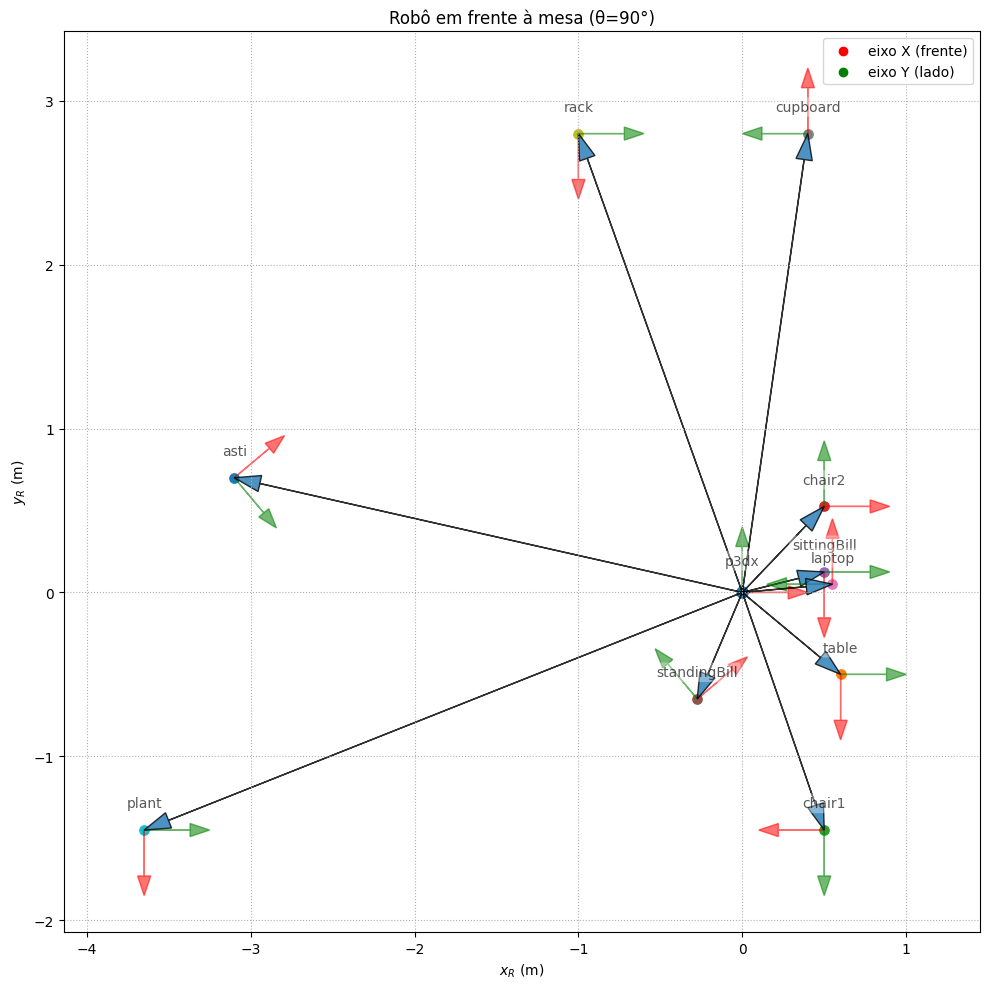

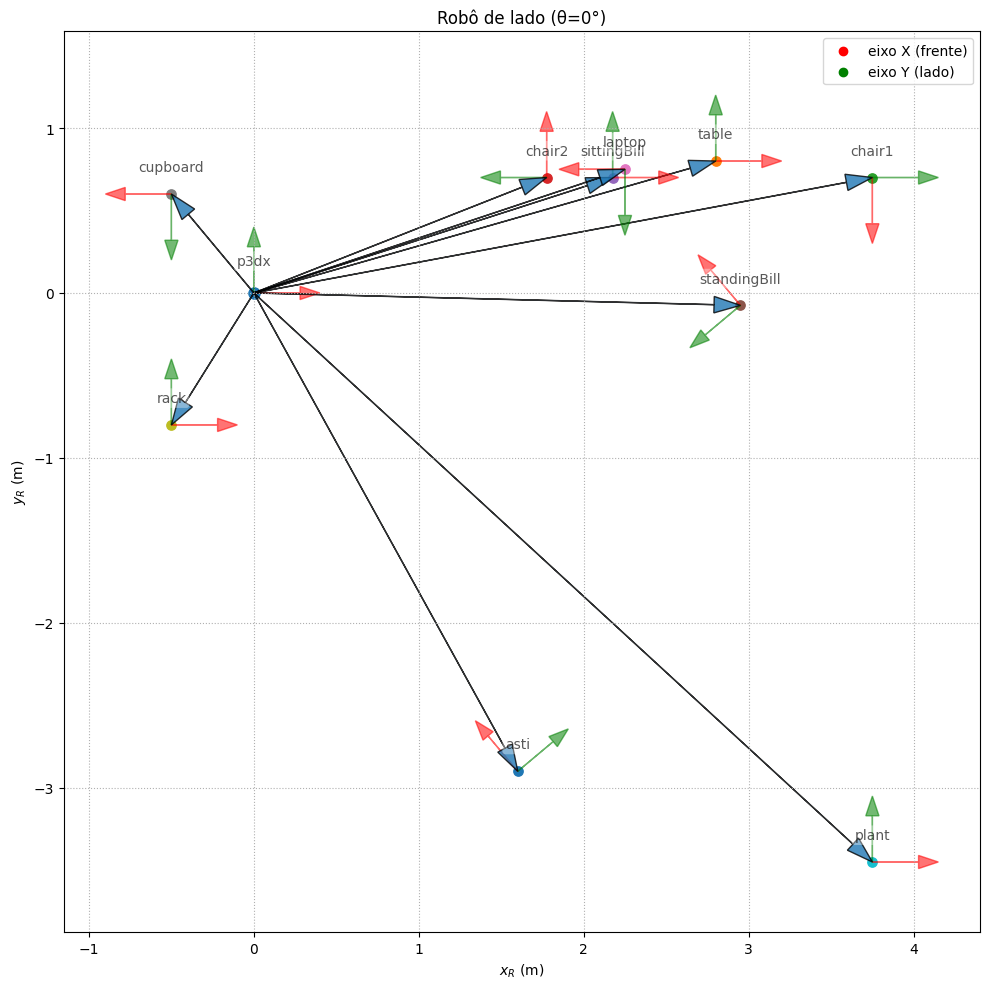

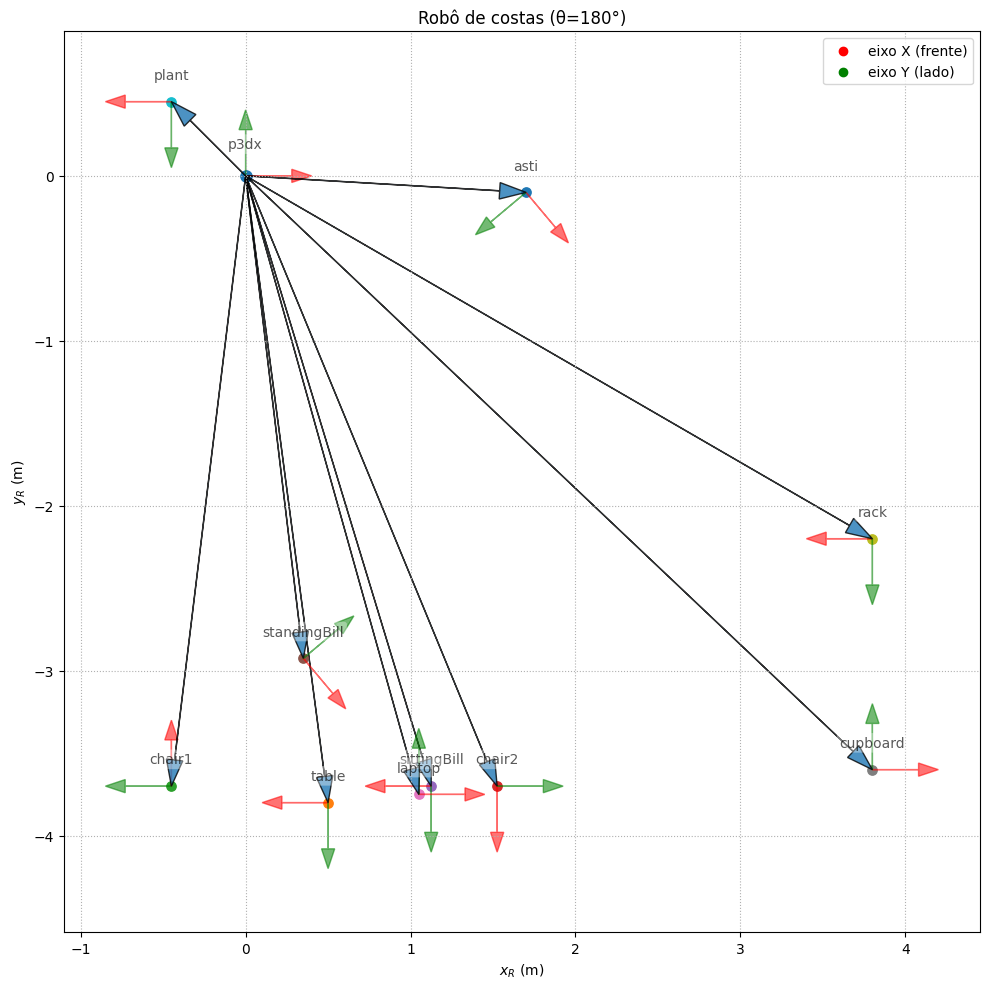

In [7]:
# Três novas configurações do robô e plots no referencial do robô
def plot_robot_view(title):
    robot_name_local = 'p3dx'
    robot_h_local = frames[robot_name_local]
    world_h_local = frames['world']

    r_pos = sim.getObjectPosition(robot_h_local, world_h_local)
    r_eul = sim.getObjectOrientation(robot_h_local, world_h_local)
    H_WR = H_from_q(r_pos[0], r_pos[1], r_eul[2], z=r_pos[2])
    H_RW = H_inv(H_WR)

    elements = [n for n in frames.keys() if n not in ('world', robot_name_local)]
    H_RE_dict = {}
    for name in elements:
        if frames[name] in (None, -1):
            continue
        H_WE = mat4_from_sim(frames[name], world_h_local)
        H_RE_dict[name] = H_mul(H_RW, H_WE)

    plt.figure(figsize=(10,10))
    AX_LEN, HEAD_W, HEAD_L = 0.40, 0.08, 0.12
    AX_ALPHA, LABEL_ALPHA = 0.55, 0.65
    LABEL_BBOX = dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.35)

    plt.scatter([0.0], [0.0], s=65)
    plt.text(0.0, 0.15, robot_name_local, ha='center', va='bottom',
             alpha=LABEL_ALPHA, bbox=LABEL_BBOX)
    plt.arrow(0,0, AX_LEN,0, length_includes_head=True,
              head_width=HEAD_W, head_length=HEAD_L, color='r', alpha=AX_ALPHA)
    plt.arrow(0,0, 0,AX_LEN, length_includes_head=True,
              head_width=HEAD_W, head_length=HEAD_L, color='g', alpha=AX_ALPHA)

    for name, H_RE in H_RE_dict.items():
        tx, ty, *_ = pose_from_H(H_RE)
        plt.scatter([tx], [ty], s=45)
        plt.text(tx, ty+0.12, name, ha='center', va='bottom',
                 alpha=LABEL_ALPHA, bbox=LABEL_BBOX)

        ex = (H_RE[0][0], H_RE[1][0])
        ey = (H_RE[0][1], H_RE[1][1])
        def scaled(v):
            L = math.hypot(v[0], v[1]) or 1.0
            return (AX_LEN*v[0]/L, AX_LEN*v[1]/L)
        dx_x, dy_x = scaled(ex)
        dx_y, dy_y = scaled(ey)

        plt.arrow(tx, ty, dx_x, dy_x, length_includes_head=True,
                  head_width=HEAD_W, head_length=HEAD_L, color='r', alpha=AX_ALPHA)
        plt.arrow(tx, ty, dx_y, dy_y, length_includes_head=True,
                  head_width=HEAD_W, head_length=HEAD_L, color='g', alpha=AX_ALPHA)

        plt.arrow(0, 0, tx, ty, length_includes_head=True,
                  head_width=0.10, head_length=0.16, alpha=0.8)

    plt.axis('equal')
    plt.grid(True, linestyle=':')
    plt.xlabel(r'$x_R$ (m)')
    plt.ylabel(r'$y_R$ (m)')
    plt.title(title)
    plt.scatter([], [], color='r', label='eixo X (frente)')
    plt.scatter([], [], color='g', label='eixo Y (lado)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


configs = [
    (0.8,  1.4,  90.0,  'Robô em frente à mesa (θ=90°)'),
    (-1.5, 1.2,   0.0,  'Robô de lado (θ=0°)'),
    (1.8, -1.8, 180.0,  'Robô de costas (θ=180°)'),
]

for x, y, th_deg, title in configs:
    z = sim.getObjectPosition(p3dx_h, -1)[2]
    sim.setObjectPosition(p3dx_h, -1, [x, y, z])
    sim.setObjectOrientation(p3dx_h, -1, [0.0, 0.0, math.radians(th_deg)])
    plot_robot_view(title)


# Atenção!
## Para executar daqui para baixo, carregue a cena "cena1_laser.ttt".
## O script da célula abaixo faz isso automaticamente, mas é necessário ajustar a variável "scene_path" ou carregar manualmente no simulador.

In [10]:
scene_path = os.path.abspath('cena1_laser.ttt')

sim.stopSimulation()
sim.closeScene()

if not os.path.exists(scene_path):
    raise FileNotFoundError(f"Cena não encontrada: {scene_path}")

sim.loadScene(scene_path)
print(f"Cena carregada: {scene_path}")

Cena carregada: /home/alexis/ufmg/2025-2/robotica-movel/tp1/robotica_movel/cena1_laser.ttt


### Questão 5. Substitui o robô adicionado inicialmente na cena pelo robô com laser. O plot da leitura do laser está sendo feito no referencial local do laser. Define as matrizes de transformações 𝑅𝐿𝑇 (laser → robô) e 𝑊𝑅𝑇 (robô → mundo), e em seguida modifica o script original para que os pontos agora sejam plotados no referencial global, de acordo com a posição atual do robô (recuperada pela RemoteAPI). Coloca o robô em outras diferentes posições da cena (e.g., três) e faça os plots das leituras do laser.

In [11]:
fastRokuyo_path = "/components/sensors/Hokuyo URG 04LX UG01_Fast.ttm"
class HokuyoSensorSim(object):
    """
    Simulates a Hokuyo laser sensor in CoppeliaSim using vision sensors.

    This class provides an interface to interact with a simulated Hokuyo sensor,
    typically attached to a robot in CoppeliaSim. It manages the underlying vision
    sensors and provides methods to retrieve sensor data in either range or point format.

    Attributes:
        _sim: The simulation API object used to interact with CoppeliaSim.
        _base_name (str): The name of the base object to which the Hokuyo sensor is attached.
        _is_range_data (bool): Determines if sensor data is returned as range values (True) or 3D points (False).
        _base_obj: The handle of the base object in the simulation.
        _vision_sensors_obj (list): Handles of the vision sensors used to simulate the Hokuyo sensor.

    Args:
        sim: The simulation API object.
        base_name (str): The name of the base object (must contain 'fastHokuyo').
        is_range_data (bool, optional): If True, sensor data is returned as range values. Defaults to False.

    Raises:
        ValueError: If 'fastHokuyo' is not in the base_name, or if the base object or vision sensors are not found.

    Methods:
        get_is_range_data() -> bool:
            Returns whether sensor data is returned as range values.

        set_is_range_data(is_range_data: bool) -> None:
            Sets whether sensor data should be returned as range values.

        getSensorData():
            Retrieves sensor data from the vision sensors.
            Returns either a list of range values or a list of 3D points, depending on _is_range_data.
    """

    _sim = None

    _base_name = ""
    _vision_sensor_name_template = "{}/sensor{}"

    # _vision_sensors_obj will be initialized in __init__
    _base_obj = None
    _is_range_data = False
    
    _angle_min=-120*math.pi/180
    _angle_max=120*math.pi/180
    _angle_increment=(240/684)*math.pi/180 # angle: 240 deg, pts: 684

    def __init__(self, sim, base_name, is_range_data=True):
        self._sim = sim
        self._base_name = base_name
        self._is_range_data = is_range_data

        if "fastHokuyo" not in base_name:
            raise ValueError(
                f"ERR: fastHokuyo must be in the base object name. Ex: `/components/sensors/Hokuyo URG 04LX UG01_Fast.ttm`"
            )

        self._base_obj = sim.getObject(base_name)
        if self._base_obj == -1:
            raise ValueError(
                f"ERR: base_obj ({self._base_obj}) is not a valid name in the simulation"
            )

        self._vision_sensors_obj = [
            sim.getObject(self._vision_sensor_name_template.format(self._base_name, 1)),
            sim.getObject(self._vision_sensor_name_template.format(self._base_name, 2)),
        ]

        if any(obj == -1 for obj in self._vision_sensors_obj):
            raise ValueError(
                f"ERR: the _vision_sensors_obj names are not valid in the simulation"
            )

    def get_is_range_data(self) -> bool:
        return self._is_range_data

    def set_is_range_data(self, is_range_data: bool) -> None:
        self._is_range_data = is_range_data

    def getSensorData(self):
        
        angle = self._angle_min
        sensor_data = []
        
        for vision_sensor in self._vision_sensors_obj:
            r, t, u = sim.readVisionSensor(vision_sensor)
            if u:
                sensorM = sim.getObjectMatrix(vision_sensor)
                relRefM = sim.getObjectMatrix(self._base_obj)
                relRefM = sim.getMatrixInverse(relRefM)
                relRefM = sim.multiplyMatrices(relRefM, sensorM)

                p = [0, 0, 0]
                p = sim.multiplyVector(sensorM, p)
                t = [p[0], p[1], p[2], 0, 0, 0]
                for j in range(int(u[1])):
                    for k in range(int(u[0])):
                        w = 2 + 4 * (j * int(u[0]) + k)
                        v = [u[w], u[w + 1], u[w + 2], u[w + 3]]
                        angle = angle + self._angle_increment
                        if self._is_range_data:
                            sensor_data.append([angle, v[3]])
                        else:
                            p = sim.multiplyVector(relRefM, v)
                            sensor_data.append([p[0], p[1], p[2]])
                            
        return np.array(sensor_data)
        
"""
Plots the laser scan data.
"""
def draw_laser_data(laser_data, max_sensor_range=5):
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')
                  
    # Combine angle and distance data for plotting
    for ang, dist in laser_data:
        # Filter out readings that are at the maximum range, as they
        # likely indicate no object was detected by that beam.
        if (max_sensor_range - dist) > 0.1:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            # Use different colors for different quadrants for clarity
            c = 'r'
            if ang < 0:    
                c = 'b'
            ax.plot(x, y, 'o', color=c)

    # Plot the sensor's origin
    ax.plot(0, 0, 'k>', markersize=10)
        
    ax.grid(True)
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])
    plt.show()

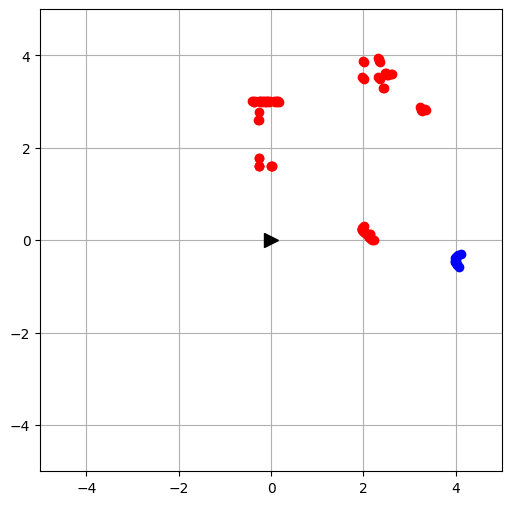

Initial Robot Position: [-1.8728182803672873, -1.8000363479961894, 0.1386648536560665]


In [ ]:
import time
try:
    # Connect to the CoppeliaSim server
    client = RemoteAPIClient()
    sim = client.require("sim")
    sim.setStepping(True)

    # Handle para o ROBÔ
    robotname = 'PioneerP3DX'
    # The new API uses sim.getObject to get handles. The path starts with '/'
    robotHandle = sim.getObject('/' + robotname)
    
    # Parar a simulação se estiver executando
    initial_sim_state = sim.getSimulationState()
    if initial_sim_state != 0:
        sim.stopSimulation()
        time.sleep(1)
    
    # Inicia a simulação
    sim.startSimulation()
    sim.step()
      
    # Fazendo uma leitura do laser
    hokuyo_sensor = HokuyoSensorSim(sim, "/"+ robotname +"/fastHokuyo")
    initial_laser_data = hokuyo_sensor.getSensorData()
    draw_laser_data(initial_laser_data)
    
    # Posição inicial do robô
    pos = sim.getObjectPosition(robotHandle, sim.handle_world)
    print(f'Initial Robot Position: {pos}')
       
    # Dados do Pioneer
    L = 0.381  # Metros
    r = 0.0975 # Metros

except Exception as e:
    print(f"An error occurred: {e}")

# Parando a simulação
sim.stopSimulation()


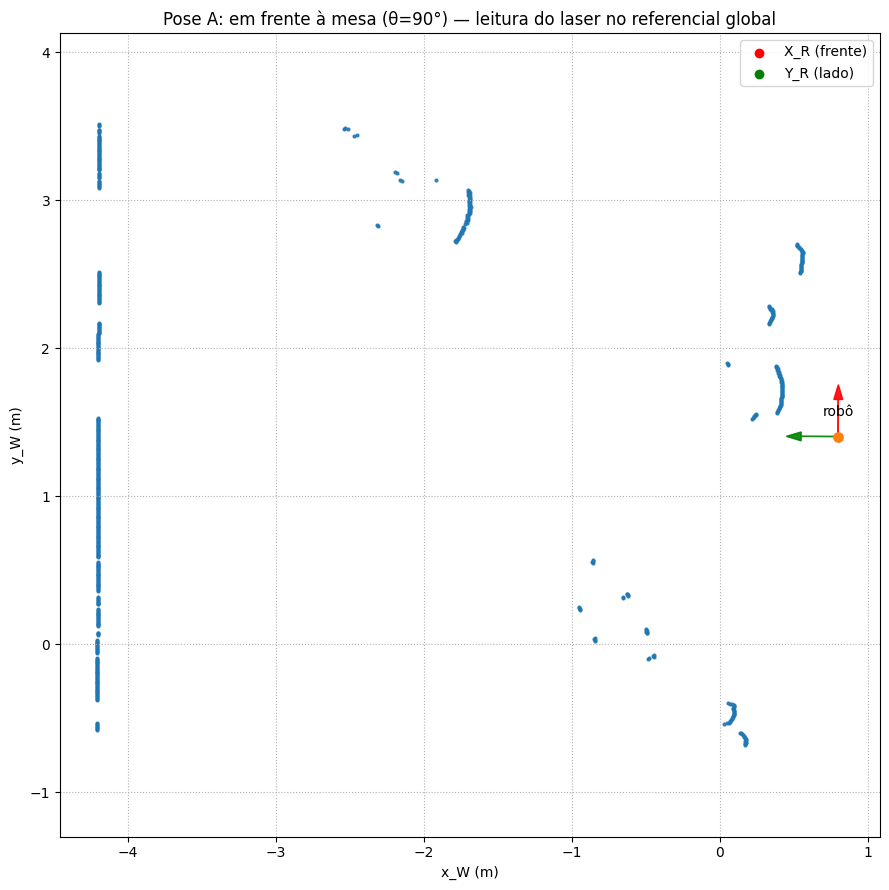

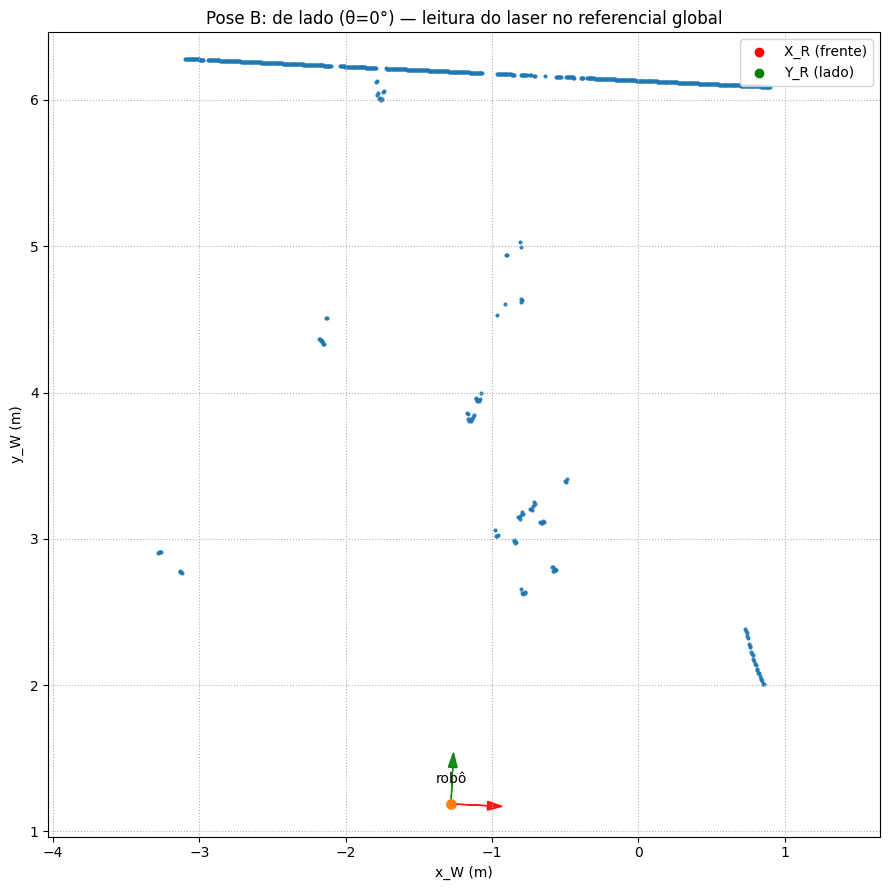

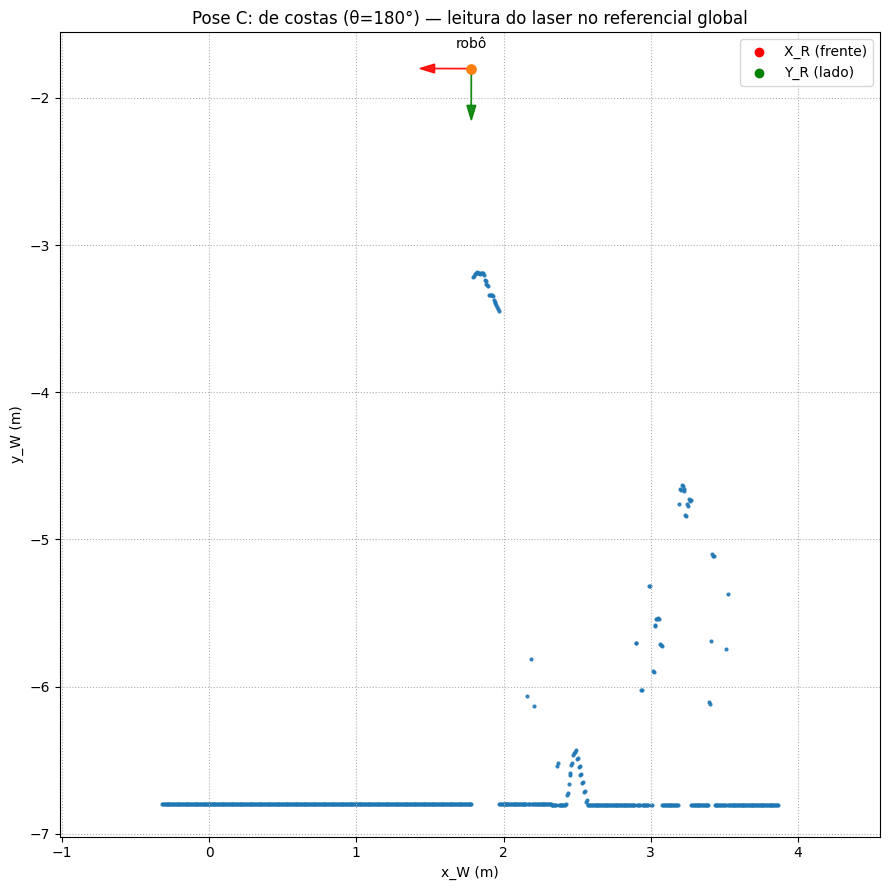

In [17]:
# Utilitários de transformação e plotagem (reaproveitando H_mul definido acima)
def _mat4(obj_h, rel_h):
    """ ^rel T_obj (4x4) """
    M = sim.getObjectMatrix(obj_h, rel_h)  # 12 vals (3x4)
    return [[M[0], M[1], M[2],  M[3]],
            [M[4], M[5], M[6],  M[7]],
            [M[8], M[9], M[10], M[11]],
            [0.0,  0.0,  0.0,   1.0]]

def _extract_xy_from_laser(data):
    """
    Tenta extrair arrays (x,y) no referencial local do laser a partir do objeto retornado
    por HokuyoSensorSim.getSensorData(). Funciona com formatos comuns:
      - {'points': [(x,y), ...]}  ou  {'x': [...], 'y': [...]}
      - {'ranges': [...], 'angles': [...]} (polar)
      - lista/np.ndarray Nx2
    """
    if isinstance(data, dict):
        if 'points' in data:
            arr = np.asarray(data['points'])
            return arr[:,0].astype(float), arr[:,1].astype(float)
        if 'x' in data and 'y' in data:
            return np.asarray(data['x'], float), np.asarray(data['y'], float)
        if 'ranges' in data and 'angles' in data:
            r = np.asarray(data['ranges'], float)
            a = np.asarray(data['angles'], float)
            return r*np.cos(a), r*np.sin(a)
    # lista/array Nx2
    arr = np.asarray(data)
    if arr.ndim == 2 and arr.shape[1] >= 2:
        return arr[:,0].astype(float), arr[:,1].astype(float)
    raise ValueError("Formato de dados do laser não reconhecido para extração de (x,y).")

def _laser_points_world(sim, robot_h, laser_h, laser_data):
    """
    Converte pontos do laser (no frame do laser) para o mundo:  p_W = ( ^W T_R · ^R T_L ) · p_L
    Retorna (xw, yw) 1D arrays.
    """
    # ^R T_L
    H_RL = _mat4(laser_h, robot_h)
    # ^W T_R
    H_WR = _mat4(robot_h, sim.handle_world)
    # ^W T_L
    H_WL = H_mul(H_WR, H_RL)

    # pontos no frame do laser
    xl, yl = _extract_xy_from_laser(laser_data)
    ones = np.ones_like(xl)
    zeros = np.zeros_like(xl)
    P_L = np.vstack((xl, yl, zeros, ones))  # 4xN

    # aplica transformação homogênea
    H = np.asarray(H_WL, float)
    P_W = H @ P_L  # 4xN
    return P_W[0, :], P_W[1, :]

def _draw_robot_pose_world(sim, robot_h, ax, axis_len=0.35):
    """Desenha origem e eixos X/Y do robô no mundo, para referência visual."""
    pos = sim.getObjectPosition(robot_h, sim.handle_world)
    eul = sim.getObjectOrientation(robot_h, sim.handle_world)  # rad
    x, y = pos[0], pos[1]
    c, s = math.cos(eul[2]), math.sin(eul[2])
    # eixo X_R no mundo
    ax.arrow(x, y, axis_len*c, axis_len*s, head_width=0.06, head_length=0.10, color='r', alpha=0.9, length_includes_head=True)
    # eixo Y_R no mundo (rot. +90°)
    ax.arrow(x, y, -axis_len*s, axis_len*c, head_width=0.06, head_length=0.10, color='g', alpha=0.9, length_includes_head=True)
    ax.scatter([x], [y], s=45)
    ax.text(x, y+0.12, "robô", ha='center', va='bottom')

def _plot_laser_world(sim, robot_h, laser_h, laser_data, title):
    """Plota as leituras do laser já no referencial global (mundo)."""
    xw, yw = _laser_points_world(sim, robot_h, laser_h, laser_data)

    fig, ax = plt.subplots(figsize=(9, 9))
    ax.scatter(xw, yw, s=4, alpha=0.85)
    _draw_robot_pose_world(sim, robot_h, ax)

    ax.axis('equal')
    ax.grid(True, linestyle=':')
    ax.set_xlabel('x_W (m)')
    ax.set_ylabel('y_W (m)')
    ax.set_title(title + " — leitura do laser no referencial global")
    # legenda mínima
    ax.scatter([], [], color='r', label='X_R (frente)')
    ax.scatter([], [], color='g', label='Y_R (lado)')
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# -------------------------------
# 1) Descobrir o handle do laser
# -------------------------------
try:
    # Se já temos robotHandle/robotname no escopo, só recupera o laser:
    laserHandle = sim.getObject('/' + robotname + '/fastHokuyo')
except Exception:
    # fallback: tenta pelo nome padrão usado acima
    laserHandle = sim.getObject('/PioneerP3DX/fastHokuyo')

# -------------------------------
# 2) Reabrir simulação e coletar/plotar em 3 poses (mundo)
# -------------------------------
try:
    sim.setStepping(True)
    sim.startSimulation()
    sim.step()

    # Conj. de poses (x, y, yaw_deg) — diferentes da inicial para cumprir o enunciado
    poses_world = [
        ( 0.80,  1.40,  90.0,  "Pose A: em frente à mesa (θ=90°)"),
        (-1.50,  1.20,   0.0,  "Pose B: de lado (θ=0°)"),
        ( 1.80, -1.80, 180.0,  "Pose C: de costas (θ=180°)"),
    ]

    for xw, yw, th_deg, titulo in poses_world:
        # fixa z atual do robô para não flutuar
        z_atual = sim.getObjectPosition(robotHandle, sim.handle_world)[2]
        sim.setObjectPosition(robotHandle, sim.handle_world, [xw, yw, z_atual])
        sim.setObjectOrientation(robotHandle, sim.handle_world, [0.0, 0.0, math.radians(th_deg)])

        # avança alguns passos para estabilizar a leitura do sensor
        for _ in range(3):
            sim.step()

        # nova leitura do laser no frame do laser
        laser_data = HokuyoSensorSim(sim, "/"+ robotname +"/fastHokuyo").getSensorData()

        # plota já no mundo usando as transformações:  ^W T_R e ^R T_L
        _plot_laser_world(sim, robotHandle, laserHandle, laser_data, titulo)

finally:
    sim.stopSimulation()

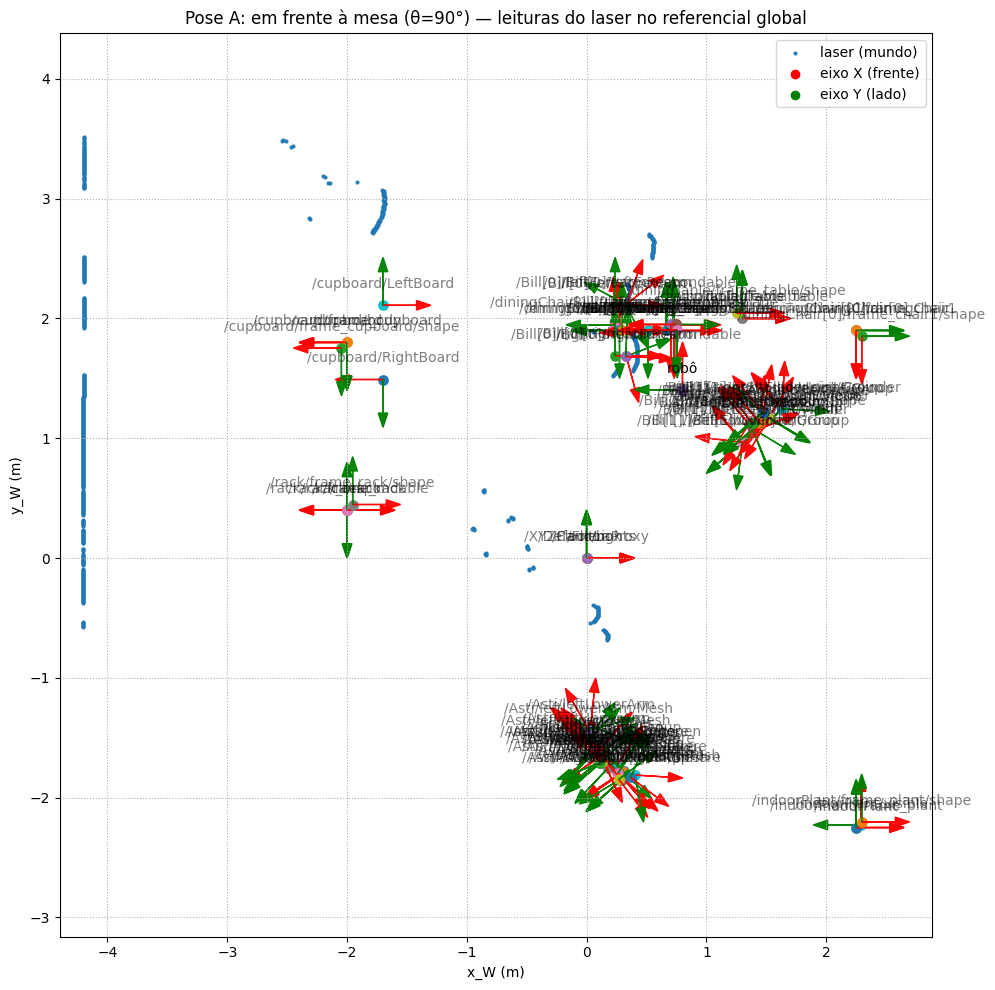

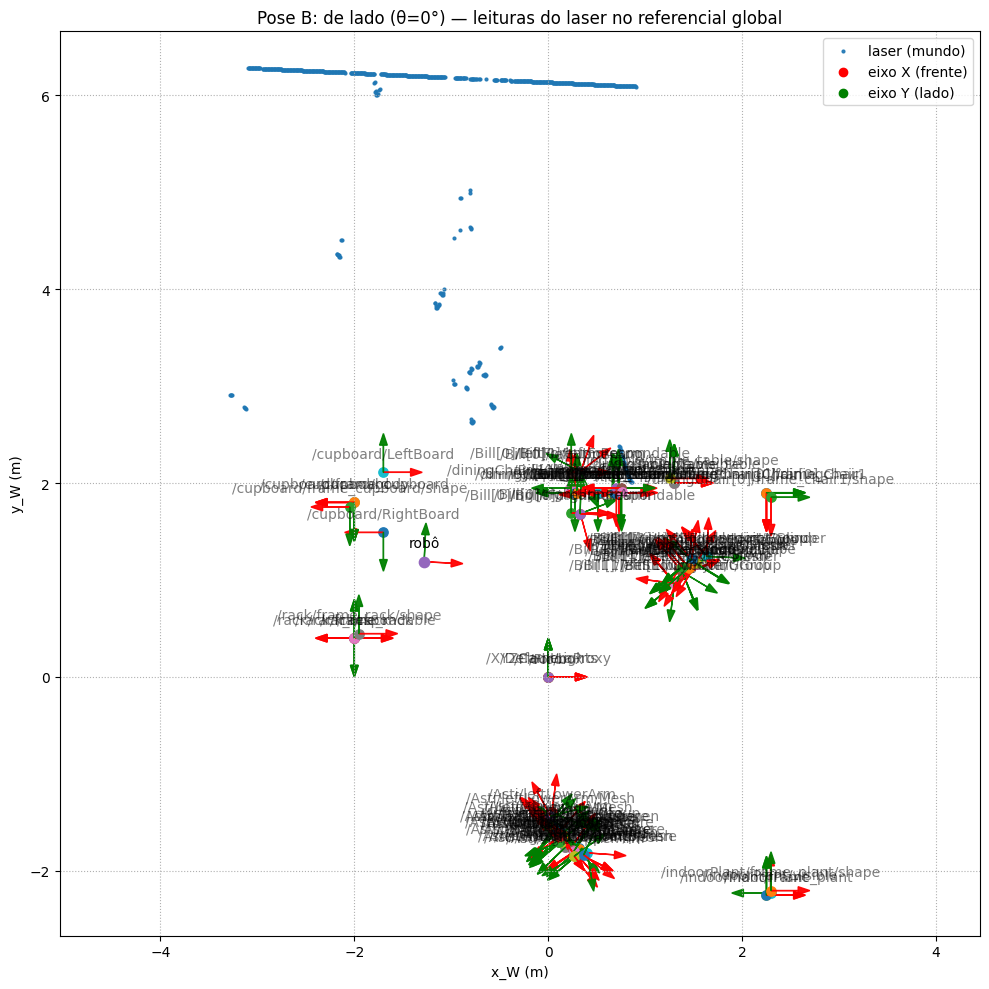

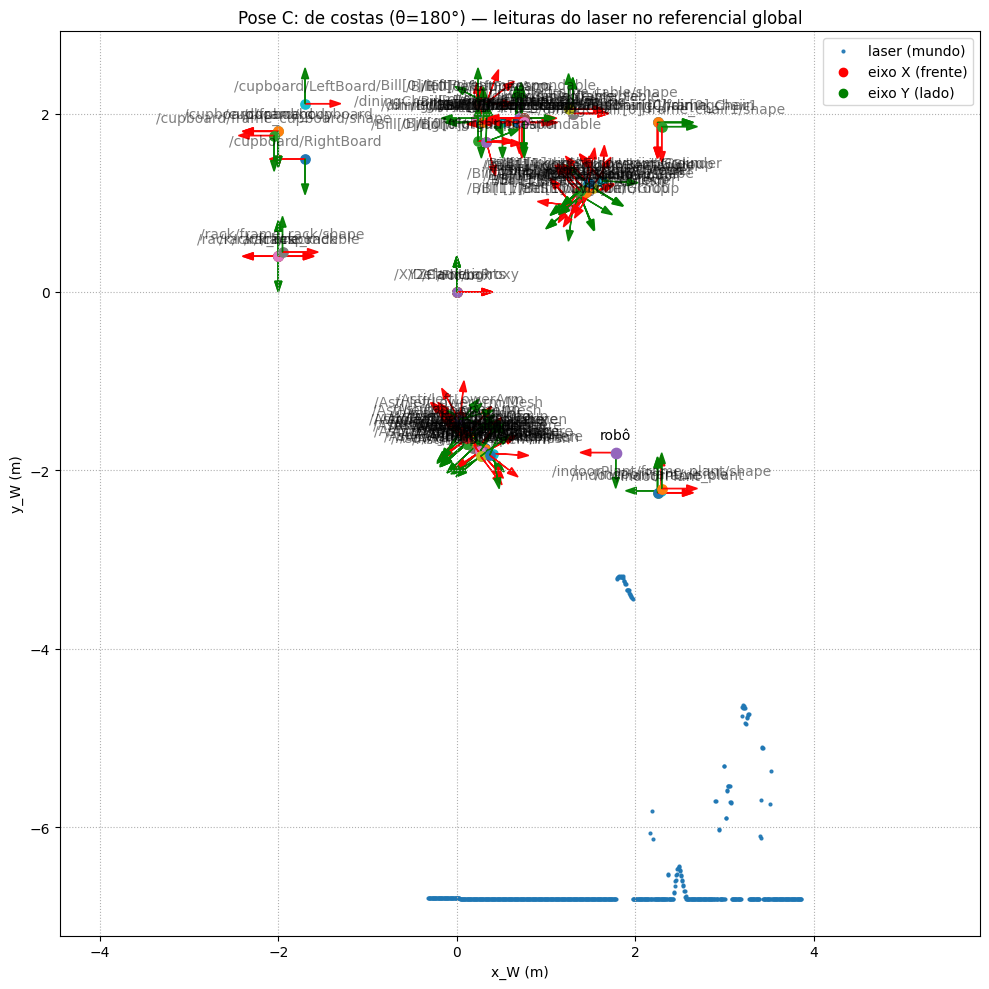

In [ ]:
# === [ADICIONAR APENAS CÓDIGO NOVO A PARTIR DAQUI] ============================================

# Utilitários de transformação/plotagem — não redeclara nada já existente no script
def _mat4(obj_h, rel_h):
    """ ^rel T_obj (4x4) """
    M = sim.getObjectMatrix(obj_h, rel_h)  # 12 vals (3x4)
    return [[M[0], M[1], M[2],  M[3]],
            [M[4], M[5], M[6],  M[7]],
            [M[8], M[9], M[10], M[11]],
            [0.0,  0.0,  0.0,   1.0]]

def _extract_xy_from_laser(data):
    """Extrai (x,y) no frame do laser (mesmo padrão dos exemplos corretos do script)."""
    if isinstance(data, dict):
        if 'points' in data:
            arr = np.asarray(data['points'])
            return arr[:,0].astype(float), arr[:,1].astype(float)
        if 'x' in data and 'y' in data:
            return np.asarray(data['x'], float), np.asarray(data['y'], float)
        if 'ranges' in data and 'angles' in data:
            r = np.asarray(data['ranges'], float)
            a = np.asarray(data['angles'], float)
            return r*np.cos(a), r*np.sin(a)
    arr = np.asarray(data)
    if arr.ndim == 2 and arr.shape[1] >= 2:
        return arr[:,0].astype(float), arr[:,1].astype(float)
    raise ValueError("Formato de dados do laser não reconhecido para extração de (x,y).")

def _laser_points_world(sim, robot_h, laser_h, laser_data):
    """Converte pontos do laser (L) para mundo (W):  ^W T_L = ^W T_R · ^R T_L."""
    H_RL = _mat4(laser_h, robot_h)                 # ^R T_L
    H_WR = _mat4(robot_h, sim.handle_world)        # ^W T_R
    H_WL = H_mul(H_WR, H_RL)                       # ^W T_L

    xl, yl = _extract_xy_from_laser(laser_data)
    ones = np.ones_like(xl)
    zeros = np.zeros_like(xl)
    P_L = np.vstack((xl, yl, zeros, ones))         # 4xN

    H = np.asarray(H_WL, float)
    P_W = H @ P_L                                   # 4xN
    return P_W[0, :], P_W[1, :]

def _draw_robot_pose_world(sim, robot_h, ax, axis_len=0.40):
    """Desenha origem e eixos X/Y do robô no mundo, respeitando o estilo dos plots do script."""
    pos = sim.getObjectPosition(robot_h, sim.handle_world)
    eul = sim.getObjectOrientation(robot_h, sim.handle_world)  # rad
    x, y = pos[0], pos[1]
    c, s = math.cos(eul[2]), math.sin(eul[2])
    # eixo X_R no mundo
    ax.arrow(x, y, axis_len*c, axis_len*s, head_width=0.08, head_length=0.12,
             color='r', alpha=0.95, length_includes_head=True)
    # eixo Y_R no mundo (rot. +90°)
    ax.arrow(x, y, -axis_len*s, axis_len*c, head_width=0.08, head_length=0.12,
             color='g', alpha=0.95, length_includes_head=True)
    ax.scatter([x], [y], s=55)
    ax.text(x, y+0.12, "robô", ha='center', va='bottom')

# -------------------------------
# LISTAGEM ROBUSTA DE OBJETOS DA CENA ATUAL (SEM USAR 'frames' DA CENA ANTIGA)
# -------------------------------
_SCENE_OBJECTS_CACHE = None

def _list_scene_objects_current(sim, robot_h, laser_h):
    """
    Lista objetos 'relevantes' da CENA ATUAL (shapes + dummies), exceto o robô e o laser,
    para evitar o erro de usar handles da cena anterior. Retorna [(handle, alias_curto), ...].
    """
    global _SCENE_OBJECTS_CACHE
    if _SCENE_OBJECTS_CACHE is not None:
        return _SCENE_OBJECTS_CACHE

    objs = []

    # Subárvore do robô (para excluir tudo que pertence a ele)
    robot_subtree = set(sim.getObjectsInTree(robot_h, sim.handle_all, 0))

    # Shapes
    try:
        shape_list = sim.getObjectsInTree(sim.handle_scene, sim.object_shape_type, 0)
    except Exception:
        shape_list = []
    # Dummies (muitos marcam referenciais úteis)
    try:
        dummy_list = sim.getObjectsInTree(sim.handle_scene, sim.object_dummy_type, 0)
    except Exception:
        dummy_list = []

    candidates = list(set(shape_list + dummy_list))

    # Remove robô, laser e seus filhos
    if laser_h is not None:
        laser_subtree = set(sim.getObjectsInTree(laser_h, sim.handle_all, 0))
    else:
        laser_subtree = set()
    filtered = [h for h in candidates if (h not in robot_subtree and h not in laser_subtree)]

    # Faz pares (handle, nome)
    for h in filtered:
        try:
            # alias curto; se falhar, usa handle como string
            name = sim.getObjectAlias(h, 5) if hasattr(sim, 'getObjectAlias') else f"obj_{h}"
        except Exception:
            name = f"obj_{h}"
        objs.append((h, name))

    _SCENE_OBJECTS_CACHE = objs
    return objs

def _draw_objects_world_current(sim, ax, robot_h, laser_h):
    """
    Desenha ponto + eixos locais para cada objeto da cena ATUAL no mundo (X vermelho, Y verde),
    como nos exemplos corretos iniciais.
    """
    AX_LEN  = 0.40
    HEAD_W  = 0.08
    HEAD_L  = 0.12
    LABEL_ALPHA = 0.50

    for h, name in _list_scene_objects_current(sim, robot_h, laser_h):
        # ^W T_obj
        H = _mat4(h, sim.handle_world)
        tx, ty = H[0][3], H[1][3]

        # ponto e rótulo
        ax.scatter([tx], [ty], s=45)
        ax.text(tx, ty+0.12, name, ha='center', va='bottom', alpha=LABEL_ALPHA)

        # eixos locais do objeto no mundo (colunas 0 e 1)
        x_axis_world = (H[0][0], H[1][0], H[2][0])
        y_axis_world = (H[0][1], H[1][1], H[2][1])

        def vec2_scaled(v3):
            vx, vy = v3[0], v3[1]
            L = math.hypot(vx, vy) or 1.0
            return (AX_LEN * vx / L, AX_LEN * vy / L)

        dx_x, dy_x = vec2_scaled(x_axis_world)
        dx_y, dy_y = vec2_scaled(y_axis_world)

        ax.arrow(tx, ty, dx_x, dy_x, length_includes_head=True,
                 head_width=HEAD_W, head_length=HEAD_L, alpha=0.95, color='r')
        ax.arrow(tx, ty, dx_y, dy_y, length_includes_head=True,
                 head_width=HEAD_W, head_length=HEAD_L, alpha=0.95, color='g')

def _plot_laser_world(sim, robot_h, laser_h, laser_data, title):
    """
    Plota a nuvem do laser no MUNDO, mais os objetos da cena ATUAL (eixos X/Y de cada objeto),
    assegurando consistência com o estilo dos gráficos corretos do script.
    """
    xw, yw = _laser_points_world(sim, robot_h, laser_h, laser_data)

    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(xw, yw, s=4, alpha=0.9, label='laser (mundo)')

    # Desenha a cena atual (sem depender do dicionário 'frames' da cena anterior)
    _draw_objects_world_current(sim, ax, robot_h, laser_h)
    _draw_robot_pose_world(sim, robot_h, ax)

    ax.axis('equal')
    ax.grid(True, linestyle=':')
    ax.set_xlabel('x_W (m)')
    ax.set_ylabel('y_W (m)')
    ax.set_title(title + " — leituras do laser no referencial global")
    ax.scatter([], [], color='r', label='eixo X (frente)')
    ax.scatter([], [], color='g', label='eixo Y (lado)')
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# -------------------------------
# 1) Handle do laser na cena atual
# -------------------------------
try:
    laserHandle = sim.getObject('/' + robotname + '/fastHokuyo')
except Exception:
    laserHandle = sim.getObject('/PioneerP3DX/fastHokuyo')

# -------------------------------
# 2) Coletar e plotar em 3 poses (mundo) COM OBJETOS CORRETOS DA CENA ATUAL
# -------------------------------
try:
    sim.setStepping(True)
    sim.startSimulation()
    sim.step()

    poses_world = [
        ( 0.80,  1.40,  90.0,  "Pose A: em frente à mesa (θ=90°)"),
        (-1.50,  1.20,   0.0,  "Pose B: de # === [ADICIONAR APENAS CÓDIGO NOVO A PARTIR DAQUI] ============================================

# Filtra apenas OBJETOS DE ALTO NÍVEL (parent = mundo) e plota sem eixos
_SCENE_OBJECTS_MODELS_CACHE = None

def _list_models_world(sim, robot_h, laser_h):
    """
    Retorna apenas objetos de 'nível de modelo' (parent direto = mundo),
    excluindo o robô, o laser e suas subárvores.
    """
    global _SCENE_OBJECTS_MODELS_CACHE
    if _SCENE_OBJECTS_MODELS_CACHE is not None:
        return _SCENE_OBJECTS_MODELS_CACHE

    # subárvores a excluir
    robot_subtree = set(sim.getObjectsInTree(robot_h, sim.handle_all, 0))
    laser_subtree = set(sim.getObjectsInTree(laser_h,  sim.handle_all, 0)) if laser_h is not None else set()

    # candidatos: qualquer objeto (shapes + dummies) cujo PAI é o mundo
    try:
        all_objs = sim.getObjectsInTree(sim.handle_scene, sim.handle_all, 0)
    except Exception:
        all_objs = []

    models = []
    for h in all_objs:
        # parent direto deve ser mundo
        try:
            parent = sim.getObjectParent(h)
        except Exception:
            continue
        if parent != sim.handle_world:
            continue

        # excluir robô/laser (e objetos especiais padrão)
        if h in robot_subtree or h in laser_subtree:
            continue
        try:
            name = sim.getObjectAlias(h, 5)
        except Exception:
            name = f"obj_{h}"
        if name.startswith("/Default") or name.startswith("/Floor"):
            continue

        models.append((h, name))

    _SCENE_OBJECTS_MODELS_CACHE = models
    return models

def _draw_models_points_only(sim, ax, robot_h, laser_h):
    """
    Plota SOMENTE um ponto + rótulo para cada objeto de alto nível (sem eixos coloridos).
    """
    LABEL_ALPHA = 0.60
    for h, name in _list_models_world(sim, robot_h, laser_h):
        H = _mat4(h, sim.handle_world)      # ^W T_obj
        tx, ty = H[0][3], H[1][3]
        ax.scatter([tx], [ty], s=45)
        ax.text(tx, ty+0.12, name, ha='center', va='bottom', alpha=LABEL_ALPHA)

# Substitui a função de plot para usar apenas os modelos e sem eixos nos objetos
def _plot_laser_world_models(sim, robot_h, laser_h, laser_data, title):
    xw, yw = _laser_points_world(sim, robot_h, laser_h, laser_data)

    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(xw, yw, s=4, alpha=0.9, label='laser (mundo)')

    # Desenha apenas os objetos de alto nível como pontos/labels
    _draw_models_points_only(sim, ax, robot_h, laser_h)
    # Pose do robô (mantém eixos do robô para referência)
    _draw_robot_pose_world(sim, robot_h, ax)

    ax.axis('equal')
    ax.grid(True, linestyle=':')
    ax.set_xlabel('x_W (m)')
    ax.set_ylabel('y_W (m)')
    ax.set_title(title + " — leituras do laser no referencial global")
    ax.scatter([], [], color='r', label='eixo X do robô')
    ax.scatter([], [], color='g', label='eixo Y do robô')
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Reexecuta os 3 plots com a nova rotina (apenas objetos de alto nível e sem eixos verdes/vermelhos nos objetos)
try:
    sim.setStepping(True)
    sim.startSimulation()
    sim.step()

    poses_world = [
        ( 0.80,  1.40,  90.0,  "Pose A: em frente à mesa (θ=90°)"),
        (-1.50,  1.20,   0.0,  "Pose B: de lado (θ=0°)"),
        ( 1.80, -1.80, 180.0,  "Pose C: de costas (θ=180°)"),
    ]

    # localiza o laser da cena atual (caso não exista variável)
    try:
        _laserH = sim.getObject('/' + robotname + '/fastHokuyo')
    except Exception:
        _laserH = sim.getObject('/PioneerP3DX/fastHokuyo')

    for xw, yw, th_deg, titulo in poses_world:
        z_atual = sim.getObjectPosition(robotHandle, sim.handle_world)[2]
        sim.setObjectPosition(robotHandle, sim.handle_world, [xw, yw, z_atual])
        sim.setObjectOrientation(robotHandle, sim.handle_world, [0.0, 0.0, math.radians(th_deg)])

        for _ in range(3):
            sim.step()

        laser_data = HokuyoSensorSim(sim, "/"+ robotname +"/fastHokuyo").getSensorData()
        _plot_laser_world_models(sim, robotHandle, _laserH, laser_data, titulo)

finally:
    sim.stopSimulation()

# === [FIM DO CÓDIGO NOVO] ======================================================================
lado (θ=0°)"),
        ( 1.80, -1.80, 180.0,  "Pose C: de costas (θ=180°)"),
    ]

    for xw, yw, th_deg, titulo in poses_world:
        z_atual = sim.getObjectPosition(robotHandle, sim.handle_world)[2]
        sim.setObjectPosition(robotHandle, sim.handle_world, [xw, yw, z_atual])
        sim.setObjectOrientation(robotHandle, sim.handle_world, [0.0, 0.0, math.radians(th_deg)])

        for _ in range(3):
            sim.step()

        laser_data = HokuyoSensorSim(sim, "/"+ robotname +"/fastHokuyo").getSensorData()
        _plot_laser_world(sim, robotHandle, laserHandle, laser_data, titulo)

finally:
    sim.stopSimulation()

# === [FIM DO CÓDIGO NOVO] ======================================================================
